# Create Dataset

In [3]:
import glob
import tqdm
from PIL import Image
import numpy as np
from pathlib import Path
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
def create_3d_data(out_dir, volumes, masks, step=10, slices=3):
    assert out_dir.exists() == False, f'{out_dir} already exists!'
    os.makedirs(f'{out_dir}/images')
    os.makedirs(f'{out_dir}/masks')
    adj = slices // 2   
    images_count = 0
    for vol_path, mask_path in tqdm.tqdm(zip(volumes, masks), total=len(volumes), desc=f'Creating data in {out_dir}'):
        vol = nib.load(vol_path).get_fdata()
        mask = (nib.load(mask_path).get_fdata() >= 1).astype(np.uint8)
        
        
        slices_vol, slices_mask = [], []
        for i in np.arange(adj, vol.shape[2]-adj, step):
            assert i-adj >= 0, f'Index {i-adj} is out of bounds'
            assert i+adj+1 <= vol.shape[2], f'Index {i+adj+1} is out of bounds'
            slices_vol.append(vol[:, :, i-adj:i+adj+1])
            slices_mask.append(mask[:, :, i-adj:i+adj+1])
        # slices_vol = [vol[:, :, i-adj:i+adj+1] for i in np.arange(0, vol.shape[2], step)]
        # slices_mask = [mask[:, :, i-adj:i+adj+1] for i in np.arange(0, mask.shape[2], step)]
        
        for slice_vol, slice_mask in zip(slices_vol, slices_mask):
            if slice_mask.sum() == 0:
                continue
            
            assert slice_vol.shape[2] == slices, f'Expected {slices} slices, got {slice_vol.shape}'
            assert slice_mask.shape[2] == slices, f'Expected {slices} slices, got {slice_mask.shape}'

            # img = Image.fromarray(slice_vol)
            # img.save(f'{out_dir}/{i:04d}.tiff')
            np.save(f'{out_dir}/images/{images_count:05d}.npy', slice_vol)
            np.save(f'{out_dir}/masks/{images_count:05d}.npy', slice_mask)
            images_count += 1
    print(f'Created {images_count} images in {out_dir}')

### 20_samples_per_7_base

In [8]:
experiment_name = 'dataset_2023_11_15'
slices = 1

syn_paths = sorted(glob.glob(f'/home/ahaas/data/3_deformed_data/{experiment_name}/images/*.nii.gz'))
syn_mask_paths = sorted(glob.glob(f'/home/ahaas/data/3_deformed_data/{experiment_name}/masks/*.nii.gz'))

real_paths = sorted(glob.glob('/home/ahaas/data/3_deformed_data/ATM22/train/images/*.nii.gz'))
real_mask_paths = sorted(glob.glob('/home/ahaas/data/3_deformed_data/ATM22/train/masks/*.nii.gz'))

out_dir = Path(f'/home/ahaas/data/4_input_cyclegan/{experiment_name}/{slices}_slices')
real_out_dir = Path(f'/home/ahaas/data/4_input_cyclegan/ATM22/{slices}_slices')

create_3d_data(out_dir / 'trainA', syn_paths, syn_mask_paths, step=5, slices=slices)
# create_3d_data(out_dir / 'testA', syn_paths[-5:], syn_mask_paths[-5:], slices=slices)
create_3d_data(real_out_dir / 'trainB', real_paths, real_mask_paths, step=5, slices=slices)
# create_3d_data(out_dir / 'testB', real_paths[-5:], real_mask_paths[-5:], slices=slices)

Creating data in /home/ahaas/data/4_input_cyclegan/dataset_2023_11_15/1_slices/trainA: 100%|██████████| 200/200 [02:11<00:00,  1.53it/s]


Created 20160 images in /home/ahaas/data/4_input_cyclegan/dataset_2023_11_15/1_slices/trainA


Creating data in /home/ahaas/data/4_input_cyclegan/ATM22/1_slices/trainB: 100%|██████████| 210/210 [02:34<00:00,  1.36it/s]

Created 21472 images in /home/ahaas/data/4_input_cyclegan/ATM22/1_slices/trainB


### Dataset_4 preparation

In [15]:
syn_paths = sorted(glob.glob('/home/ahaas/airway-seg/vessel_graph_generation/datasets/dataset_4/images/*.nii.gz'))
syn_mask_paths = ['/home/ahaas/data/ATM22_masks/ATM_253_0000_mask_lobes.nii.gz',]*10 + [
                  '/home/ahaas/data/ATM22_masks/ATM_255_0000_mask_lobes.nii.gz',]*10 + [
                  '/home/ahaas/data/ATM22_masks/ATM_257_0000_mask_lobes.nii.gz']*10
                  
real_scans = [10, 27, 56, 57, 116, 175, 221, 253, 255, 257, 190, 191, 192, 15, 16, 17, 32, 33, 34, 36, 70, 71, 72, 100, 108, 112, 151, 152, 153, 210]
real_paths = [f'/home/shared/Data/ATM22/train/images/ATM_{scan:03d}_0000.nii.gz' for scan in real_scans]
real_mask_paths = [f'/home/ahaas/data/ATM22_masks/ATM_{scan:03d}_0000_mask_lobes.nii.gz' for scan in real_scans]

out_dir = Path('/home/ahaas/data/syn2CT/noise_3slices')

create_3d_data(out_dir / 'trainA', syn_paths[:-5], syn_mask_paths[:-5], slices=3)
create_3d_data(out_dir / 'testA', syn_paths[-5:], syn_mask_paths[-5:], slices=3)
create_3d_data(out_dir / 'trainB', real_paths[:-5], real_mask_paths[:-5], slices=3)
create_3d_data(out_dir / 'testB', real_paths[-5:], real_mask_paths[-5:], slices=3)

Creating data in /home/ahaas/data/syn2CT/noise_3slices/trainA: 100%|██████████| 25/25 [01:13<00:00,  2.92s/it]


Created 1400 images in /home/ahaas/data/syn2CT/noise_3slices/trainA


Creating data in /home/ahaas/data/syn2CT/noise_3slices/testA: 100%|██████████| 5/5 [00:12<00:00,  2.52s/it]


Created 250 images in /home/ahaas/data/syn2CT/noise_3slices/testA


Creating data in /home/ahaas/data/syn2CT/noise_3slices/trainB: 100%|██████████| 25/25 [01:05<00:00,  2.64s/it]


Created 1276 images in /home/ahaas/data/syn2CT/noise_3slices/trainB


Creating data in /home/ahaas/data/syn2CT/noise_3slices/testB: 100%|██████████| 5/5 [00:13<00:00,  2.68s/it]

Created 275 images in /home/ahaas/data/syn2CT/noise_3slices/testB


### 1D in tiff

In [3]:
def create_data(out_dir, volumes, masks, step=10):
    assert out_dir.exists() == False, f'{out_dir} already exists!'
    os.makedirs(out_dir)
    i = 0
    for vol_path, mask_path in tqdm.tqdm(zip(volumes, masks), total=len(volumes), desc=f'Creating data in {out_dir}'):
        vol = nib.load(vol_path).get_fdata()
        mask = (nib.load(mask_path).get_fdata() >= 1).astype(np.uint8)        
        
        slices_vol = [vol[:, :, i] for i in np.arange(0, vol.shape[2], step)]
        slices_mask = [mask[:, :, i] for i in np.arange(0, mask.shape[2], step)]
        for slice_vol, slice_mask in zip(slices_vol, slices_mask):
            if slice_mask.sum() == 0:
                continue
            img = Image.fromarray(slice_vol)
            img.save(f'{out_dir}/{i:04d}.tiff')
            np.save(f'{out_dir}/{i:04d}_mask.npy', slice_mask)
            i += 1
    print(f'Created {i} images in {out_dir}')

In [5]:
# out_dir = Path('/home/ahaas/pytorch-CycleGAN-and-pix2pix/datasets/syn2CT_2')
out_dir = Path('/home/ahaas/data/syn2CT/no_noise')
create_data(out_dir / 'trainA', syn_paths[:-5], syn_mask_paths[:-5])
create_data(out_dir / 'testA', syn_paths[-5:], syn_mask_paths[-5:])
create_data(out_dir / 'trainB', real_paths[:-5], real_mask_paths[:-5])
create_data(out_dir / 'testB', real_paths[-5:], real_mask_paths[-5:])

Creating data in /home/ahaas/data/syn2CT/no_noise/trainA: 100%|██████████| 25/25 [01:10<00:00,  2.83s/it]


Created 1400 images in /home/ahaas/data/syn2CT/no_noise/trainA


Creating data in /home/ahaas/data/syn2CT/no_noise/testA: 100%|██████████| 5/5 [00:12<00:00,  2.48s/it]


Created 250 images in /home/ahaas/data/syn2CT/no_noise/testA


Creating data in /home/ahaas/data/syn2CT/no_noise/trainB: 100%|██████████| 25/25 [01:08<00:00,  2.74s/it]


Created 1273 images in /home/ahaas/data/syn2CT/no_noise/trainB


Creating data in /home/ahaas/data/syn2CT/no_noise/testB: 100%|██████████| 5/5 [00:13<00:00,  2.80s/it]

Created 274 images in /home/ahaas/data/syn2CT/no_noise/testB


### Visualize

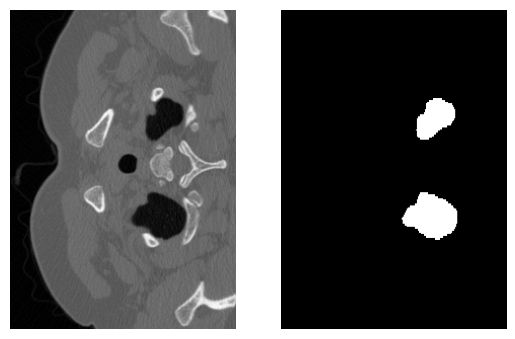

In [13]:
sample = '3580'
ATM = np.load(f'/home/ahaas/data/4_input_cyclegan/20_samples_per_7_base/3_slices/trainB/images/{sample}.npy')
mask = np.load(f'/home/ahaas/data/4_input_cyclegan/20_samples_per_7_base/3_slices/trainB/masks/{sample}.npy')

plt.figure()
plt.subplot(121)
plt.imshow(ATM[:, :, 1], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask[:, :, 1], cmap='gray')
plt.axis('off')
plt.show()

# Create masks

In [ ]:
import subprocess
import tqdm
import os

In [ ]:
out_dir = '/home/ahaas/data/ATM22_masks_refined'
for scan in tqdm.tqdm([10, 27, 56, 57, 116, 175, 221, 253, 255, 257, 190, 191, 192, 15, 16, 17, 32, 33, 34, 36, 70, 71, 72, 100, 108, 112, 151, 152, 153, 210]):
    if os.path.exists(f'{out_dir}/ATM_{scan:03d}_0000_mask_lobes.nii.gz'):
        print(f'ATM_{scan:03d}_0000_mask_lobes.nii.gz already exists')
        continue
    subprocess.run(['lungmask', '--modelname', 'LTRCLobes_R231', f'/home/shared/Data/ATM22/train/images/ATM_{scan:03d}_0000.nii.gz', f'{out_dir}/ATM_{scan:03d}_0000_mask_lobes.nii.gz', '--noprogress'])
